# Project-5:Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker 
(Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine
whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian 
non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
We use 3 sets of controls. 

These are:
1.A single cell estimate of the population 16+ for each state.
2.Controls for Hispanic Origin by age and sex.
3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end
we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating 
"weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic 
characteristics should have similar weights. There is one important caveat to remember about this statement. That is that
since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.

Objective:To predict whether a person makes income over $50k a year or not.
Target variable:Income is dependent variable

In [163]:
#importing all the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [164]:
#loading the dataset
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Observation:
1.There are 32560 rows and 15 columns in the dataset.

2.Dataset consists of both numerical datatypes and categorical datatypes,where cataegorical datatypes has to convert into numeric datatype before building a model.

3.Income column has two class i)>=50 and ii) <=50 which we have to apply label encoder to process for model building.Thus this is a binary classification problem.

In [165]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [166]:
df.columns #we can see various columns names.

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'], dtype='object')

In [167]:
df.shape #this shows there are 32560 rows and 15 columns

(32560, 15)

In [168]:
df.head() #shows first five rows of the dataset.

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [169]:
df.tail() #shows last 5 rows of the dataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [170]:
df.dtypes #shows the datatypes of the features

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are 9 categorical datatypes and 6 numeric data type.

In [171]:
# description of the categorcal features
df.describe(include=np.object)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


From the count section ,
1.we observe that there is no missing value. 

2.There are 9 disntict values in workclass,1 disntinct values in education,7 distinct values in marital_status,
15 distinct values in occupation,6 distinct values in relationship,5 disntinct values in Race,2 disntinct values in sex,
42 disnct values in native_country,2 distinct values in income.

# Describe Method

The pandas.describe function is used to get a descriptive statistics summary of a given dataframe.
If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.

mean - The average (mean) value.

std - The standard deviation.

min - the minimum value.

25% - The 25% percentile*.

50% - The 50% percentile*.

75% - The 75% percentile*.

max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile

In [172]:
# description of  numerical feautres description:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


1.There is no missing value from count section.

2.Average age of the person is 38.5 years ,minimum age is 17 yrs and maximum is 90yrs.

3.The avg. fnl of the population is 189781.

4.The average capital_gain is 1077.

5.The average capital_loss is 87.

6.Avg.Hours_per_week is 49hours.

7.The standard deviation is very high in fnlwgt,capital_gain.,capital_loss.

8.Most of the columns has high gap between 75%percentile and max. which means that outliers is present.   

In [173]:
df.nunique().to_frame("Unique Values") #gives all the distinct values of all the columns

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [174]:
df.isnull().sum()   #Checking for null values in the datas

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We saw that there is no missing value

<AxesSubplot:>

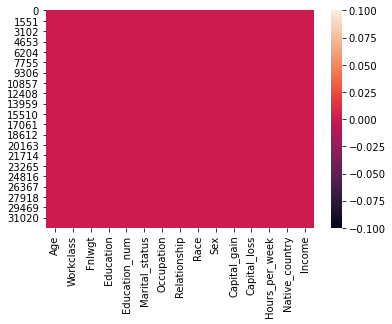

In [175]:
sns.heatmap(df.isnull()) #checking missing value through with heatmap

no missing value presesnt in dataset.

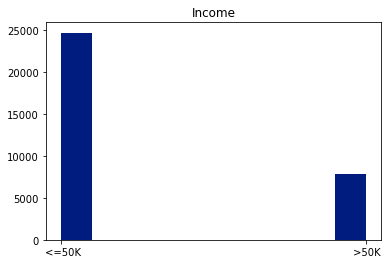

In [176]:
df["Income"].hist(grid=False)
plt.title("Income")
plt.show()

The target column "income" is not balanced.So we will be applying smote technique for the same.

In [177]:
obj=["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex",               
      "Native_country","Income"]
len(obj)

9

length of the obj column is 9

In [178]:
non_obj= ["Age","Fnlwgt","Capital_gain","Education_num","Capital_loss","Hours_per_week"]

len(non_obj)

6

Length of the non_obj column is 6

# Univariate Analysis
univariate Analysis for categorical columns

In [179]:
def univariateAnalysis_category(obj):
    print("Details of " + obj)
    print("----------------------------------------------------------------")
    print(df[obj].value_counts())    

In [180]:
for x in obj:
    univariateAnalysis_category(x)

Details of Workclass
----------------------------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Details of Education
----------------------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Details of Marital_status
----------------------------------------------------------------
 Married-civ-spouse       14976
 Never-married            10682
 D

We can see "?" in the columns "Workclass", "Occupation" and "Native_country". We will need to replace all the rows that have this "?" in them with a proper name first.

In [181]:
df['Workclass'].replace({' ?':' Other-Working-Class'},inplace=True)
df['Occupation'].replace({' ?':' Other-Occupation'},inplace=True)
df['Native_country'].replace({' ?':' Others'},inplace=True)

In [182]:
def univariateAnalysis_category(obj):
    print("Details of " + obj)
    print("----------------------------------------------------------------")
    print(df[obj].value_counts())
    plt.figure()
    df[obj].value_counts().plot.bar(title="Frequency Distribution of " + obj)#, color = "blue")
    plt.show()
    print("       ")

Details of Workclass
----------------------------------------------------------------
 Private                22696
 Self-emp-not-inc        2541
 Local-gov               2093
 Other-Working-Class     1836
 State-gov               1297
 Self-emp-inc            1116
 Federal-gov              960
 Without-pay               14
 Never-worked               7
Name: Workclass, dtype: int64


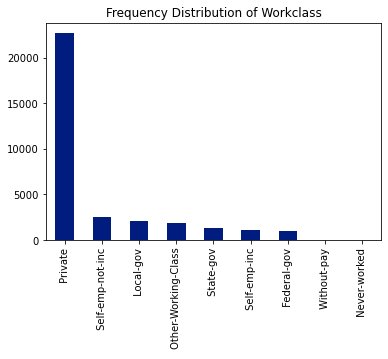

       
Details of Education
----------------------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


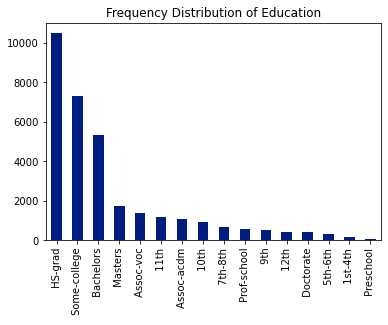

       
Details of Marital_status
----------------------------------------------------------------
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


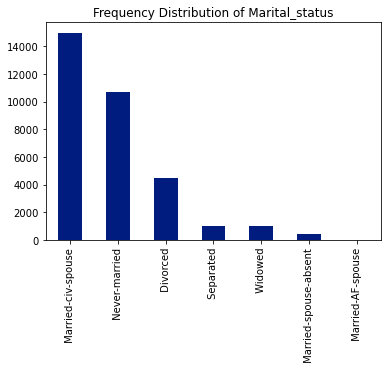

       
Details of Occupation
----------------------------------------------------------------
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Other-Occupation     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


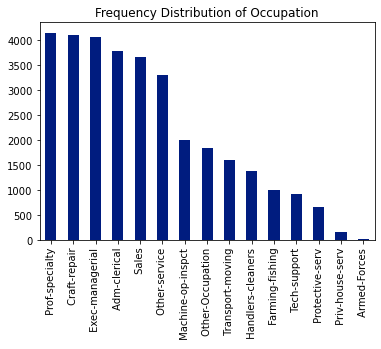

       
Details of Relationship
----------------------------------------------------------------
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


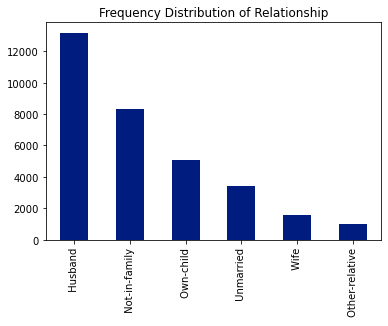

       
Details of Race
----------------------------------------------------------------
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


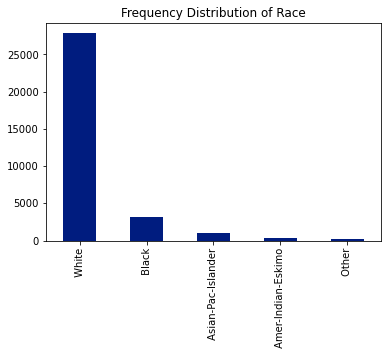

       
Details of Sex
----------------------------------------------------------------
 Male      21789
 Female    10771
Name: Sex, dtype: int64


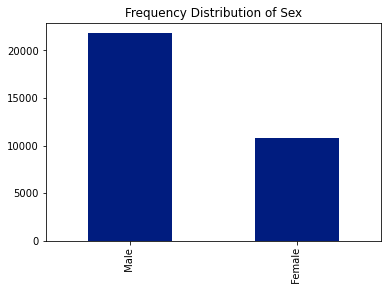

       
Details of Native_country
----------------------------------------------------------------
 United-States                 29169
 Mexico                          643
 Others                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal    

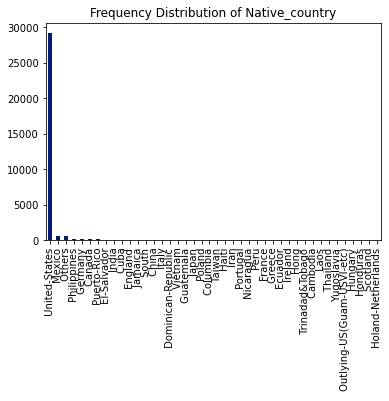

       
Details of Income
----------------------------------------------------------------
 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


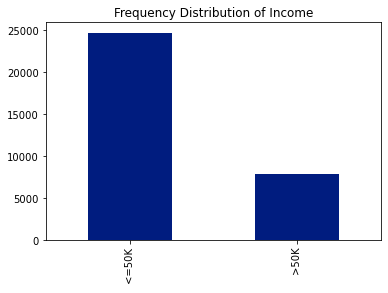

In [183]:
for x in obj:
    univariateAnalysis_category(x)

Observation:
The frequency distribution plot shows that it is a graph or data set organized to represent the frequency of occurrence
of each possible outcome of an event that is observed a specific number of times.

Thus we see that question mark has been susscefully replaced by given name in dataset.

1.Workclass:More people belong to the private workclass followed by self-emp-not-inc and least are never worked.
    
2.Education:People belong to the Hs-graduate are more followed by some-college and least is preschool.
    
3.Marital Status:Married-civ-spouse are more in number followed by never -married and least is married-Af-spouse.
    
4.Occupation: Occupation column has various categories and prof-speciality,craft-repair,exec-managerial are evenly distributed and
least is  armed-forces.

5.Relationship: The relatioship status showing husband is the highest and other relative has the lowest data.
    
6.Race: Race column mostly comprises of White people in the dataset. 
    
7.Sex:Male are more in number comparison to female.
    
8.Native_country:Native column has highest number for United states and least is Holand-Netherlands.
    
9.Income:People having income leass than 50k are more in number than people having income greater than 50k.    

<Figure size 432x288 with 0 Axes>

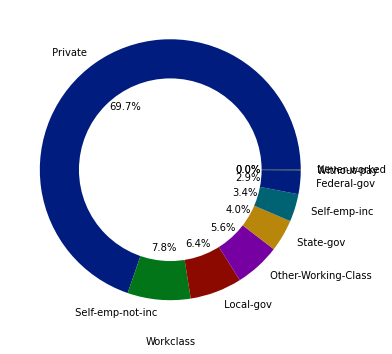

<Figure size 432x288 with 0 Axes>

In [184]:
plt.figure(figsize=(8,6))
df['Workclass'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Workclass")
plt.ylabel('')
plt.figure()   

Private comprises 69.7% of workclass data. 

<Figure size 432x288 with 0 Axes>

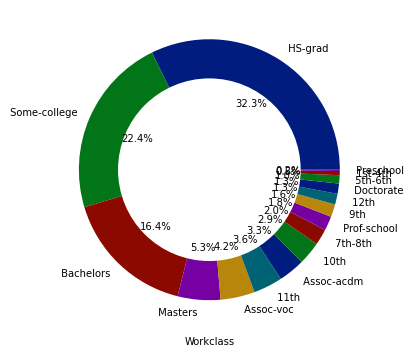

<Figure size 432x288 with 0 Axes>

In [185]:
plt.figure(figsize=(8,6))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Workclass")
plt.ylabel('')
plt.figure()   

HS-grad comprises of 32.3% and least is preschool. 

<Figure size 432x288 with 0 Axes>

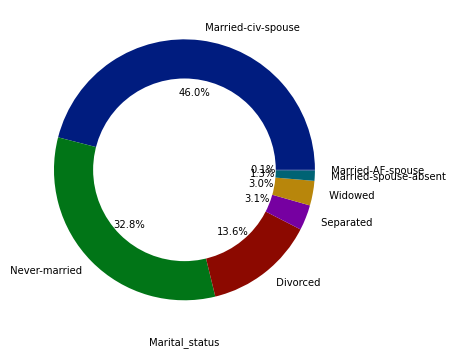

<Figure size 432x288 with 0 Axes>

In [186]:
plt.figure(figsize=(8,6))
df['Marital_status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Marital_status")
plt.ylabel('')
plt.figure()   

Married-civ-spouse are 46% of marital_status 

<Figure size 432x288 with 0 Axes>

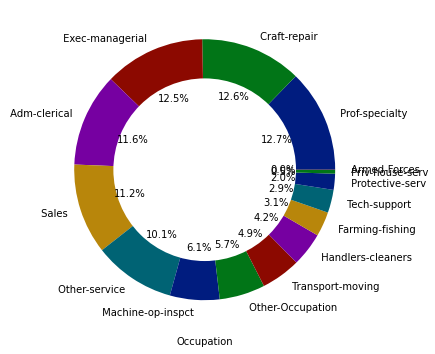

<Figure size 432x288 with 0 Axes>

In [187]:
plt.figure(figsize=(8,6))
df['Occupation'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Occupation")
plt.ylabel('')
plt.figure()   

Craft-repair comprises of 12.6%.

<Figure size 432x288 with 0 Axes>

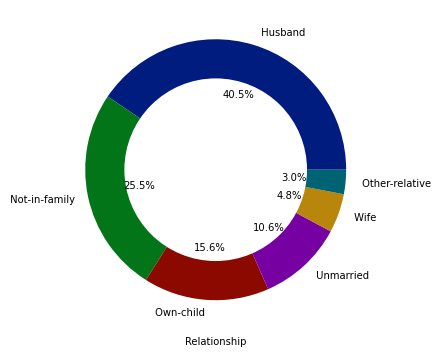

<Figure size 432x288 with 0 Axes>

In [188]:
plt.figure(figsize=(8,6))
df['Relationship'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Relationship")
plt.ylabel('')
plt.figure()   

Husband comprises of 40.5% of relationship status and least is other-relative.

<Figure size 432x288 with 0 Axes>

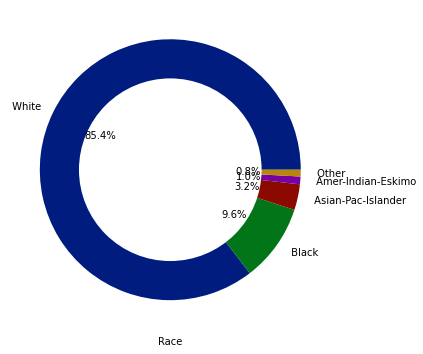

<Figure size 432x288 with 0 Axes>

In [189]:
plt.figure(figsize=(8,6))
df['Race'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Race")
plt.ylabel('')
plt.figure()   

White race comprise of 85.4% and least is other. 

<Figure size 432x288 with 0 Axes>

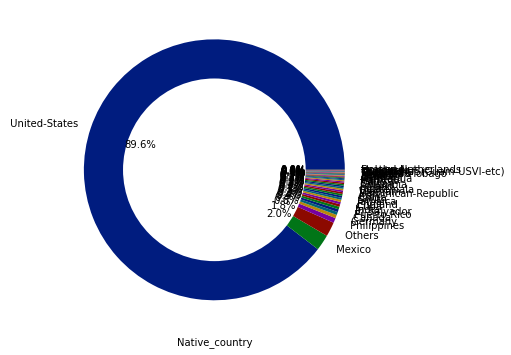

<Figure size 432x288 with 0 Axes>

In [190]:
plt.figure(figsize=(8,6))
df['Native_country'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Native_country")
plt.ylabel('')
plt.figure()   

United_states comprises of 89.6% of Native_country.

<Figure size 432x288 with 0 Axes>

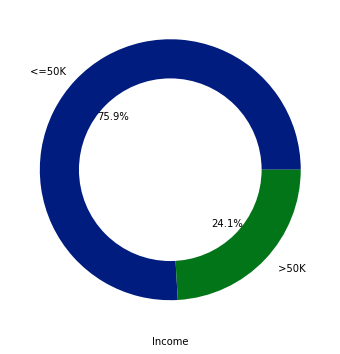

<Figure size 432x288 with 0 Axes>

In [191]:
plt.figure(figsize=(8,6))
df['Income'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel("Income")
plt.ylabel('')
plt.figure()   

Income less than 50k comprises of 75.9% .

# Univariate Analaysis for numeric column

In [192]:
def univariateAnalysis_numeric(non_obj,nbins):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    sns.displot(df[non_obj], kde=True)#, color='blue')
    plt.title("Distribution of " + non_obj)
    plt.show()
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = df.boxplot(non_obj,patch_artist=True)
    plt.title("BoxPlot of " + non_obj)
    plt.ylabel('Values')
    plt.show()

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

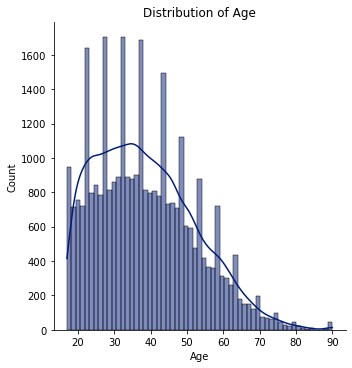

----------------------------------------------------------------------------


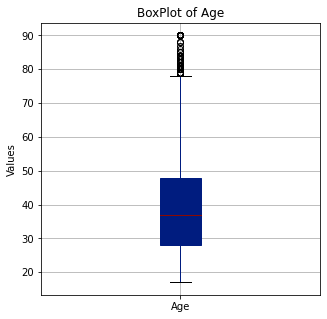

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

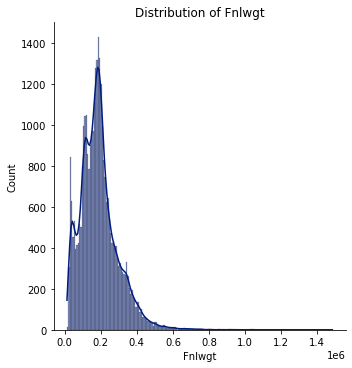

----------------------------------------------------------------------------


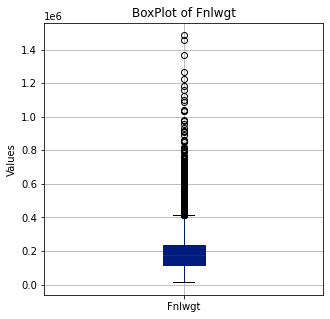

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

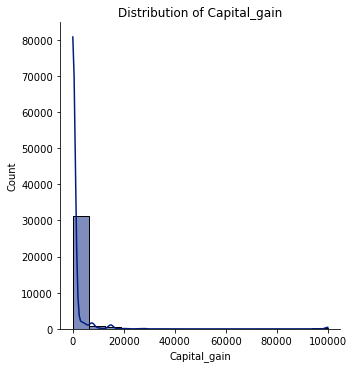

----------------------------------------------------------------------------


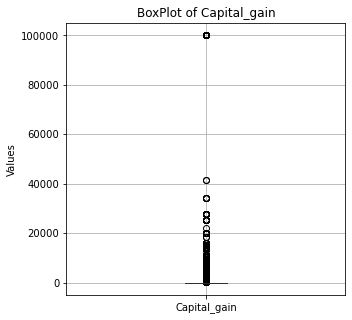

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

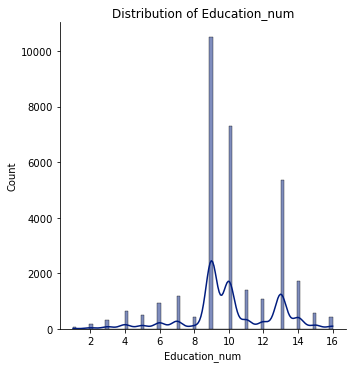

----------------------------------------------------------------------------


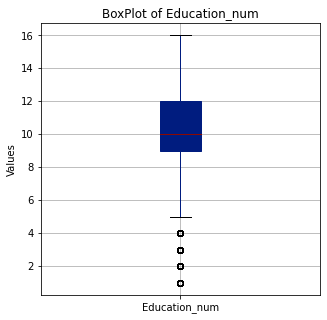

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

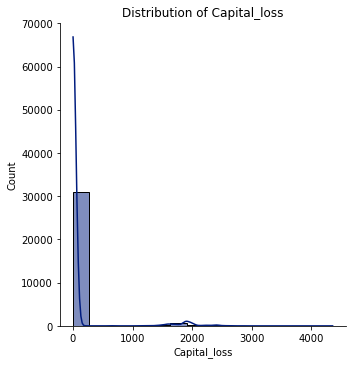

----------------------------------------------------------------------------


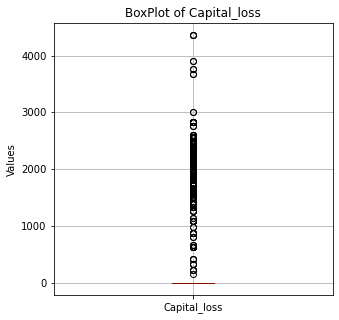

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

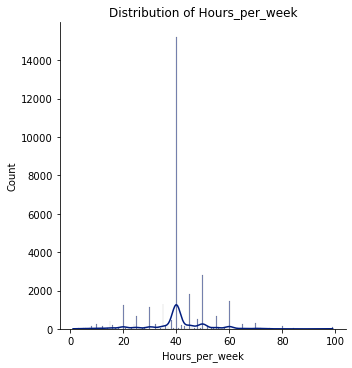

----------------------------------------------------------------------------


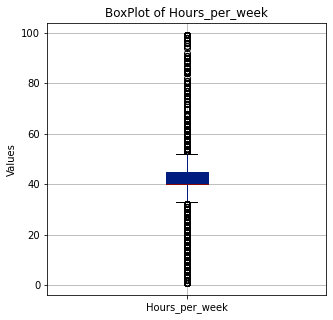

In [193]:
for x in non_obj:
    univariateAnalysis_numeric(x, 100);

Thus we see that most of the columns are skewed and not normally distributed and having outliers.

# Bivariate/Multivariate Analysis

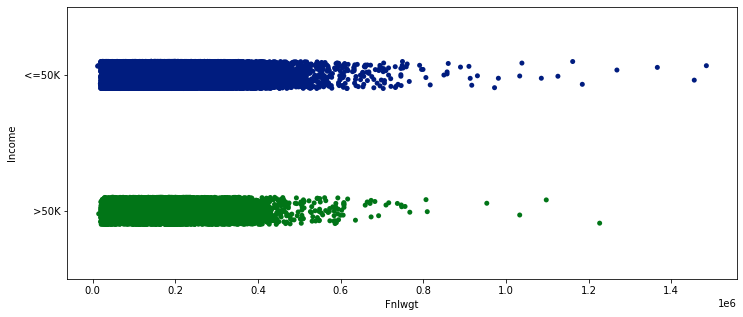

In [194]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

We see that people earning income less than 50k are more final weight than people earning income greater than 50k

<Figure size 864x360 with 0 Axes>

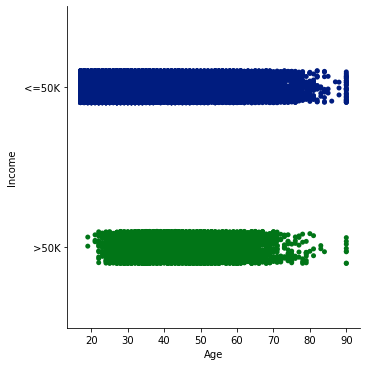

In [195]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.catplot(x = 'Age', y = 'Income', data=df)
plt.show()

Young People are earning more than 50k are less in number.

<Figure size 864x360 with 0 Axes>

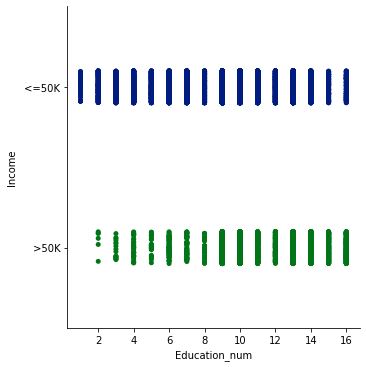

In [196]:
plt.figure(figsize=(12,5))
sns.catplot(x = 'Education_num', y = 'Income', data=df)
plt.show()

People having income greater than 50k having low education number than people having income less than 50k    

<Figure size 864x360 with 0 Axes>

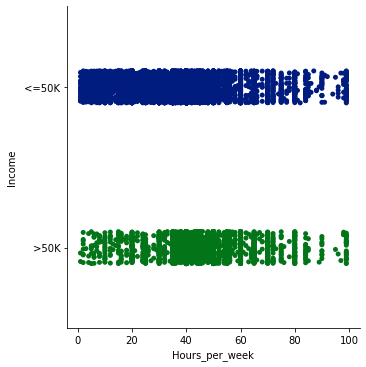

In [197]:
plt.figure(figsize=(12,5))
sns.catplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

 people having income less than or equal to 50K put in more hours per week as compared to the one's who earn more than 50K as income.

<Figure size 864x360 with 0 Axes>

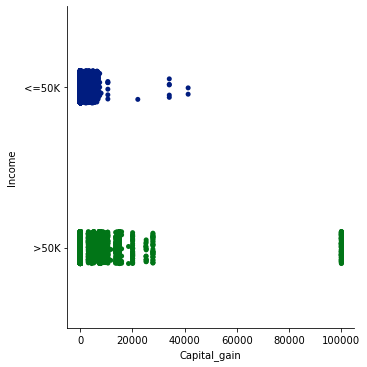

In [198]:
plt.figure(figsize=(12,5))
sns.catplot(x = 'Capital_gain', y = 'Income', data=df)
plt.show()

People earning more than 50k having high capital_gain .

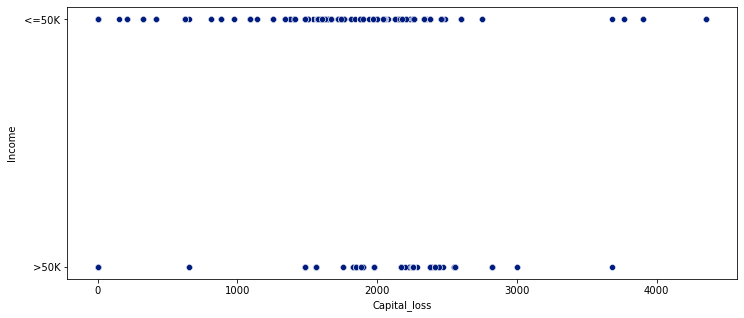

In [199]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = 'Capital_loss', y = 'Income', data=df)
plt.show()

People having income more than 50k having less capital_loss than the people having less income 50k.

In [200]:
data=pd.crosstab(df["Income"],df["Race"],margins=True,normalize='index').style.format('{:.1%}').background_gradient(
)
data

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Income,,,,,
<=50K,1.1%,3.1%,11.1%,1.0%,83.7%
>50K,0.5%,3.5%,4.9%,0.3%,90.8%
All,1.0%,3.2%,9.6%,0.8%,85.4%


Thus we see that people having income less than and more than 50k belongs to white race maximum. 

In [201]:
data=pd.crosstab(df["Relationship"],df["Income"],margins=True,normalize='index').style.format('{:.1%}').background_gradient(
)
data

Income,<=50K,>50K
Relationship,,
Husband,55.1%,44.9%
Not-in-family,89.7%,10.3%
Other-relative,96.2%,3.8%
Own-child,98.7%,1.3%
Unmarried,93.7%,6.3%
Wife,52.5%,47.5%
All,75.9%,24.1%


People having income less than and more than 50k belong to the relatioship status of husband more.

In [202]:
data=pd.crosstab(df["Marital_status"],df["Income"],margins=True,normalize='index').style.format('{:.1%}').background_gradient(
)
data

Income,<=50K,>50K
Marital_status,,
Divorced,89.6%,10.4%
Married-AF-spouse,56.5%,43.5%
Married-civ-spouse,55.3%,44.7%
Married-spouse-absent,91.9%,8.1%
Never-married,95.4%,4.6%
Separated,93.6%,6.4%
Widowed,91.4%,8.6%
All,75.9%,24.1%


Thus using cross tabulation,we see that people having income less than 50k are comprises of married spouse-absent ,divorced status and never married status more.

<function matplotlib.pyplot.show(close=None, block=None)>

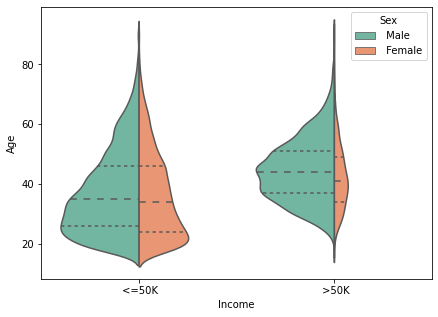

In [203]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show

Male inspite of any income group are high in number than female

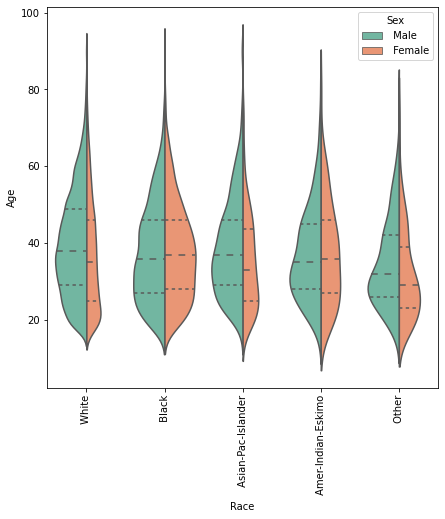

In [204]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Female belonging to the black race in age group from 20-50 are high than any female race.

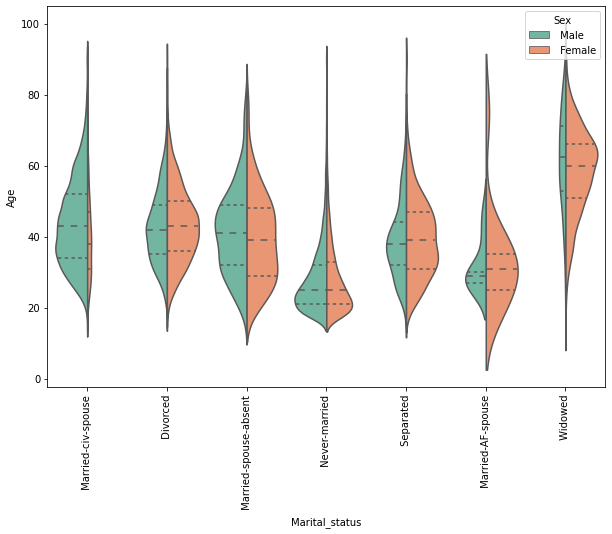

In [205]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Female who are separated are more in number than the male who are sepearated.marital status as married civ spouse
have a higher number in male than in female and people who are widowed have a higher number in females 
as compared to the males.Male and female are eually distribbuted for married spouse absent.


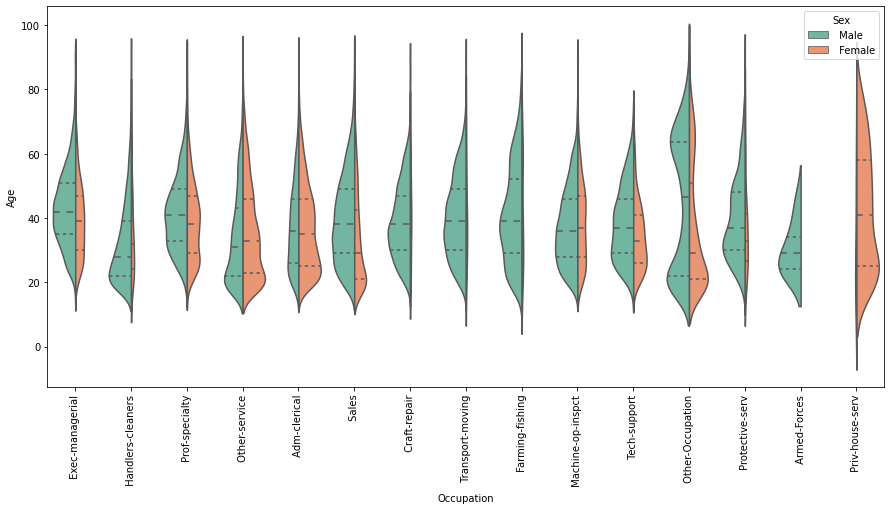

In [206]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Male having occupation like craft repair,transport moving,farmimg op instinct,protective serv,armed forces,
handlers-cleaners,sales,prof-speciality are high in numer than female in the same profession.Female who are priv-house-serve,other-service,adm-clerical are high than male in same profession in the age group of mostly 15-60.

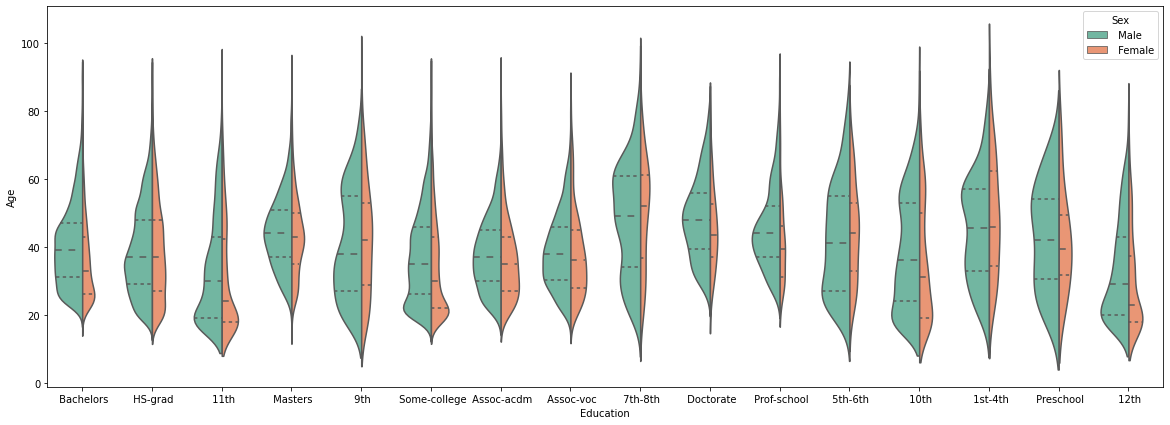

In [207]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

The eductaion category see high number of males than females between the age group of 15-60.

<AxesSubplot:title={'center':'Income'}, ylabel='Hours_per_week'>

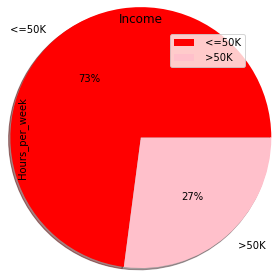

In [208]:
df.groupby(['Income']).sum().plot(kind='pie', y='Hours_per_week', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],radius=1.5,shadow=True,
                                title='Income')

Those who work for more hours_per_week having income less than equal to 50k

<AxesSubplot:title={'center':'Education_num'}, ylabel='Education_num'>

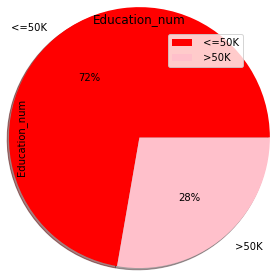

In [209]:
df.groupby(['Income']).sum().plot(kind='pie', y='Education_num', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],radius=1.5,shadow=True,
                                title='Education_num')

Education number covered more for people having income less than eual to 50k

<AxesSubplot:xlabel='Hours_per_week', ylabel='Age'>

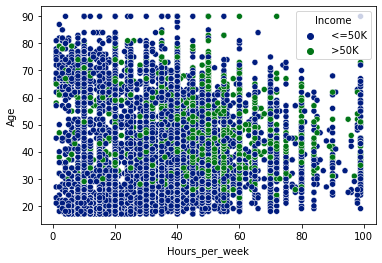

In [210]:
sns.scatterplot(data=df, x='Hours_per_week', y='Age', hue='Income')

People earning less than and equal to 50k put more hours_per_week than rest between age group of 20-70. 

# Encoding the categorical object datatype columns

In [211]:
# Label Encoder
le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


LabelEncoder is used to convert the object data type in the target column "Income" to a numerical format.

In [212]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['Workclass'] = oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Race'] = oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Relationship'] = oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Sex']= oe.fit_transform(df['Sex'].values.reshape(-1,1))
df['Native_country'] = oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0,0


Ordinal Encoder is used to convert the categorical data type to a numerical format.

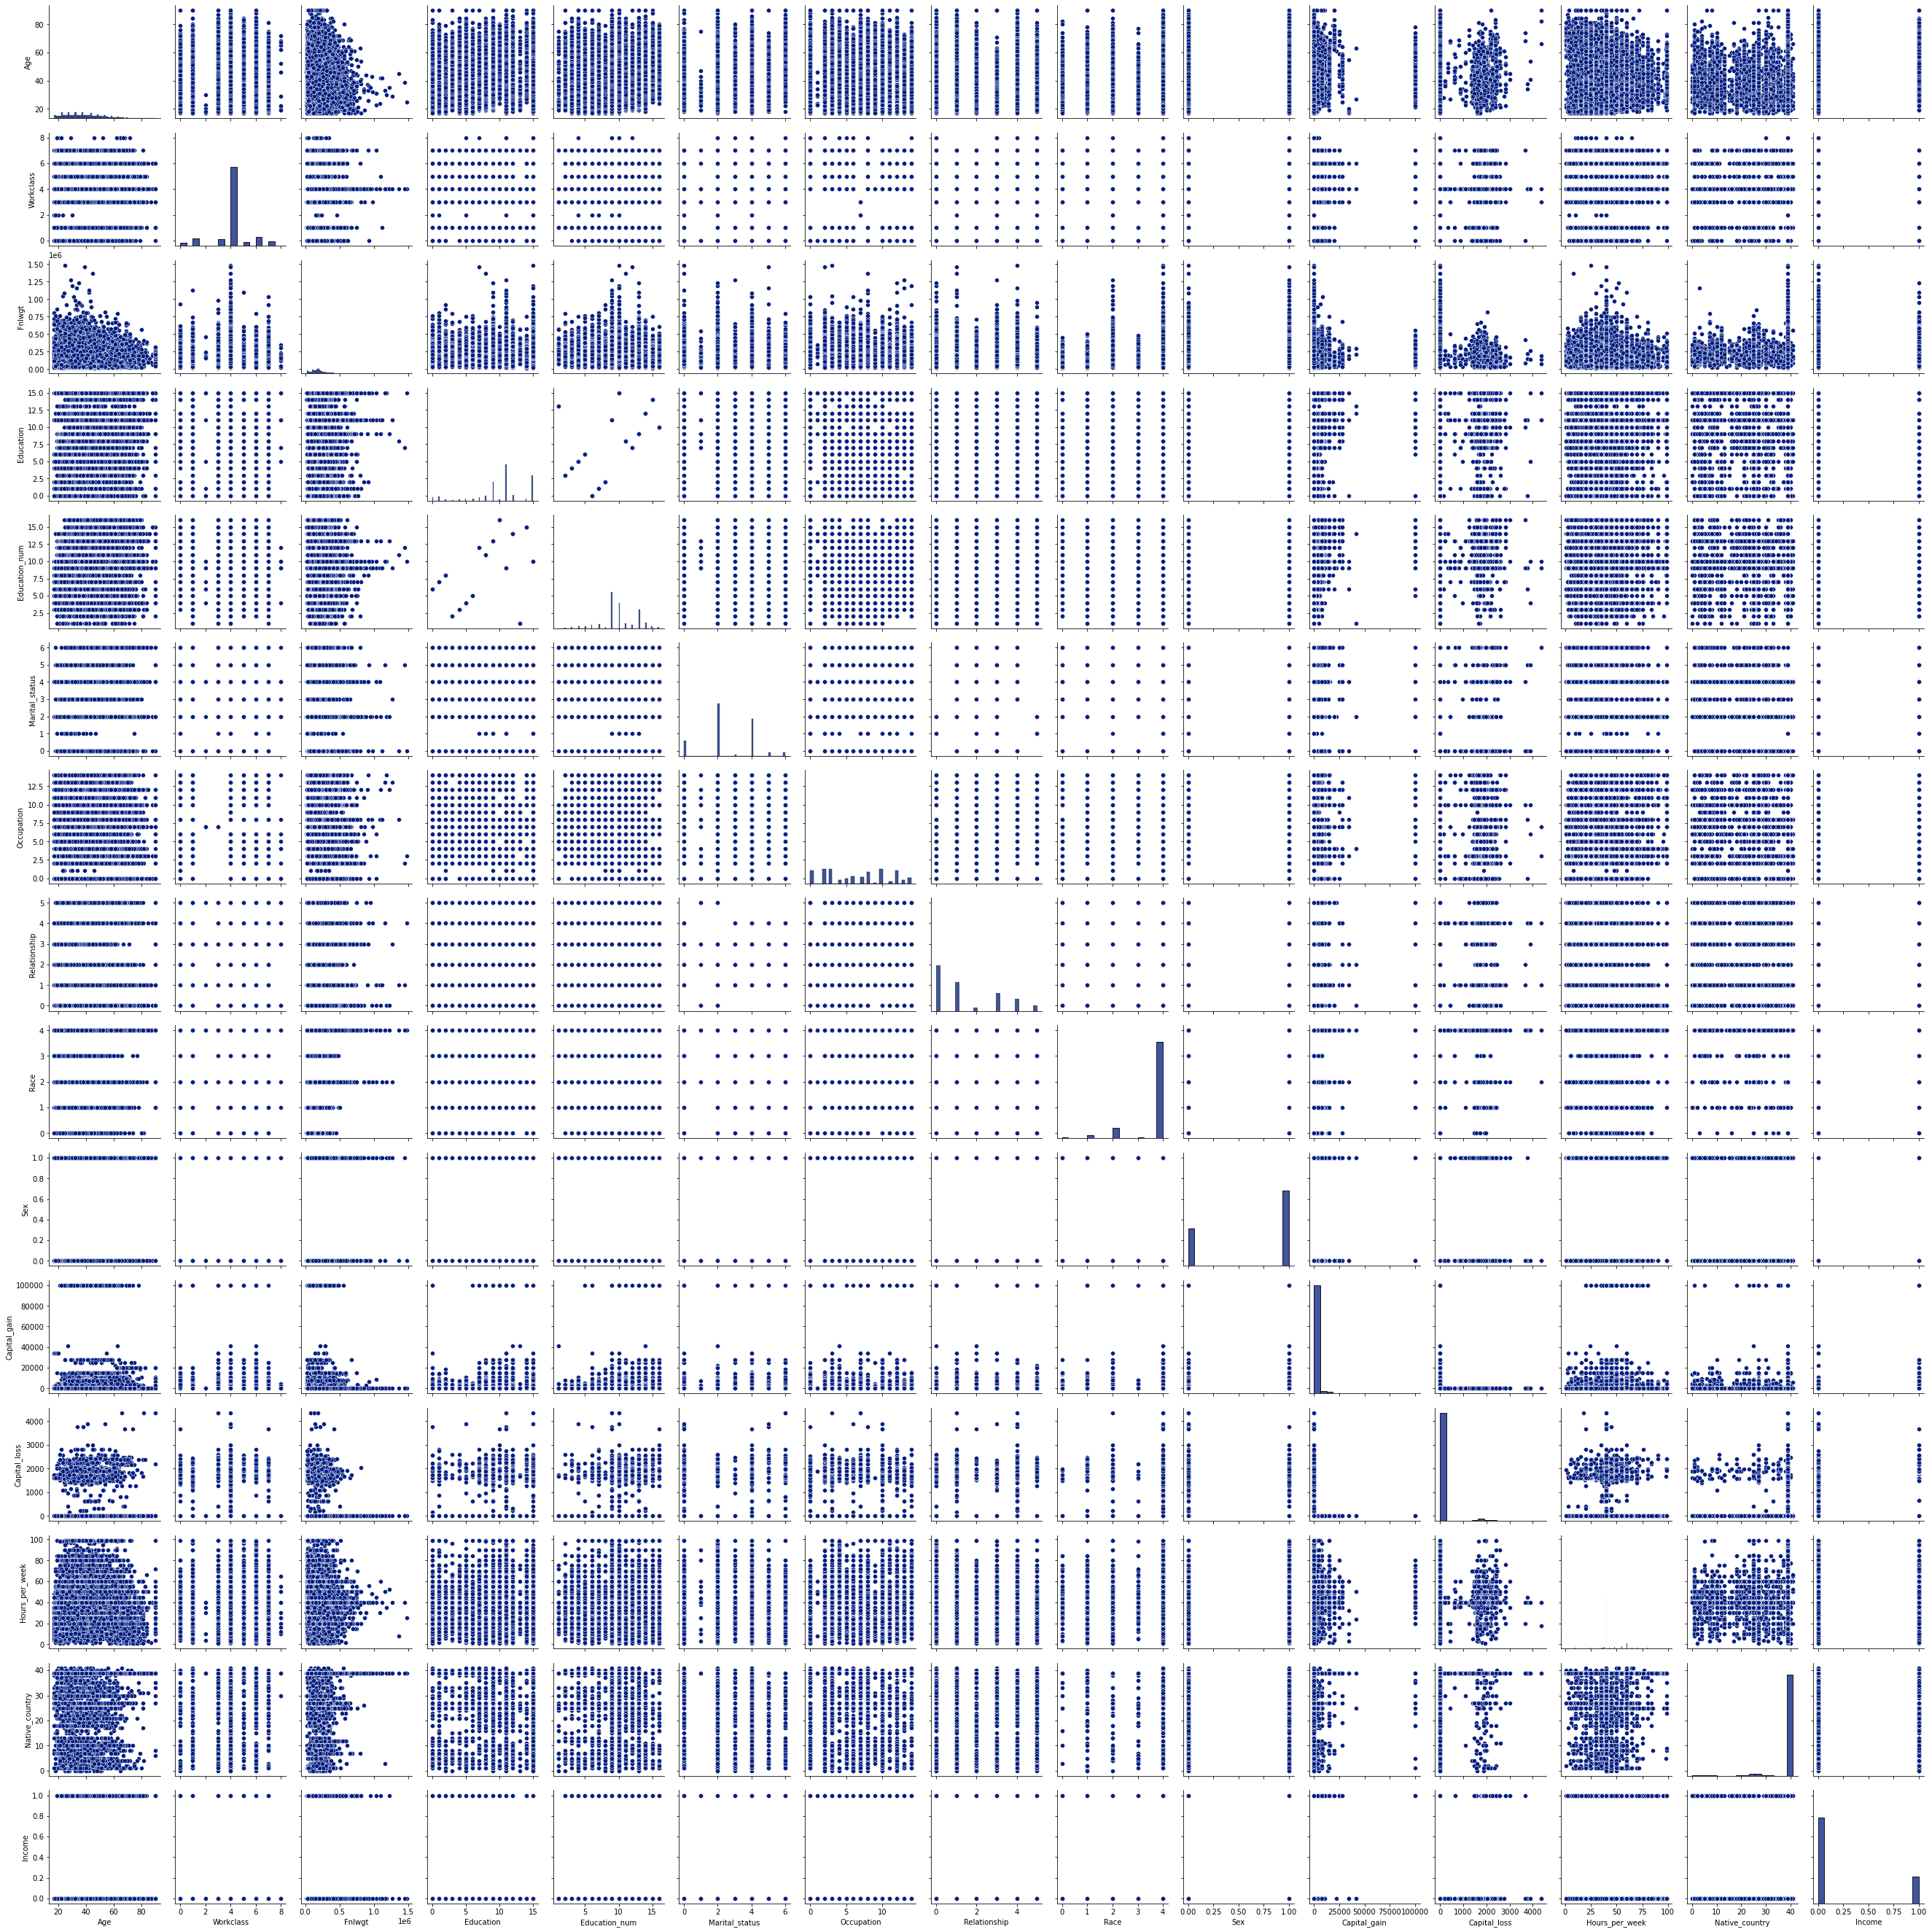

In [213]:
sns.pairplot(df) #shows the correlation among  features.

Using heatmap ,we observe that the correlation and we can determine that there is no multi colinearity
issue between our column.

In [214]:
corr=df.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.008676,-0.076646,-0.010508,0.036527,-0.266292,-0.006221,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.000215,0.234039
Workclass,0.008676,1.000000,-0.018017,0.001001,-0.009089,-0.021033,-0.000524,-0.060688,0.053443,0.076753,0.030563,0.000954,0.059916,-0.010058,0.002252
Fnlwgt,-0.076646,-0.018017,1.000000,-0.028156,-0.043159,0.028184,0.000023,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.064520,-0.009481
Education,-0.010508,0.001001,-0.028156,1.000000,0.359172,-0.038398,-0.034562,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.077589,0.079311
Education_num,0.036527,-0.009089,-0.043159,0.359172,1.000000,-0.069338,0.091522,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.082418,0.335182
Marital_status,-0.266292,-0.021033,0.028184,-0.038398,-0.069338,1.000000,0.028162,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023865,-0.199295
Occupation,-0.006221,-0.000524,0.000023,-0.034562,0.091522,0.028162,1.000000,-0.039954,-0.004136,0.043381,0.021146,0.011739,0.004328,-0.006531,0.045372
Relationship,-0.263698,-0.060688,0.008922,-0.010879,-0.094145,0.185461,-0.039954,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.009215,-0.250924
Race,0.028718,0.053443,-0.021278,0.014135,0.031825,-0.068025,-0.004136,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.130910,0.071853
Sex,0.088832,0.076753,0.026882,-0.027349,0.012256,-0.129337,0.043381,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.002117,0.215995


This shows the positive and negative correlation among the features.

# checking outliers 
Checking Outliers by Zscore technique

In [215]:
df.shape

(32560, 15)

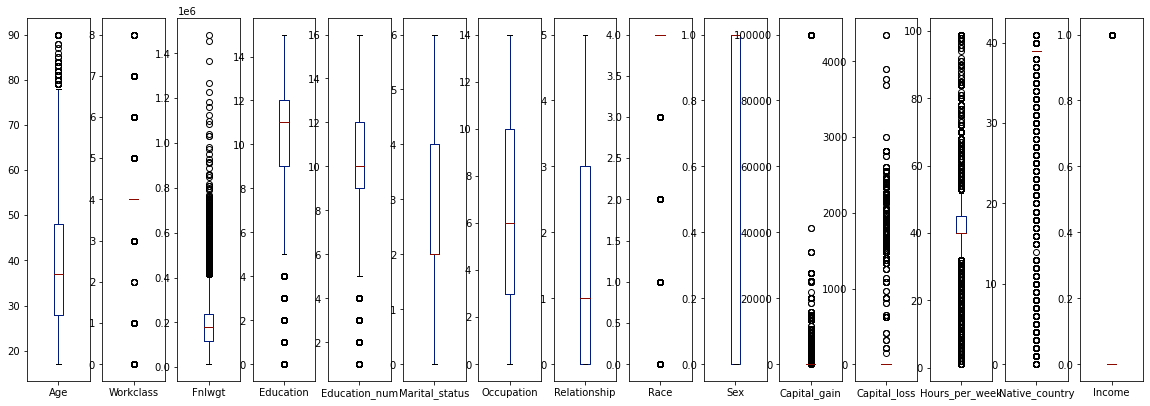

In [216]:
df.plot(kind ='box',subplots = True, figsize =[20,8])
plt.subplots_adjust(bottom=0.25)

In [217]:
#removal of outliers
z = np.abs(zscore(df))
threshold = 3
dfnew = df[(z<3).all(axis = 1)]

print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", dfnew.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

df=dfnew.copy() # reassigning to our original dataframe name

Dataframe Shape before removing outliers:  (32560, 15)
Dataframe Shape after removing outliers:  (27782, 15)
Percentage of data loss after outlier removal:  14.674447174447176


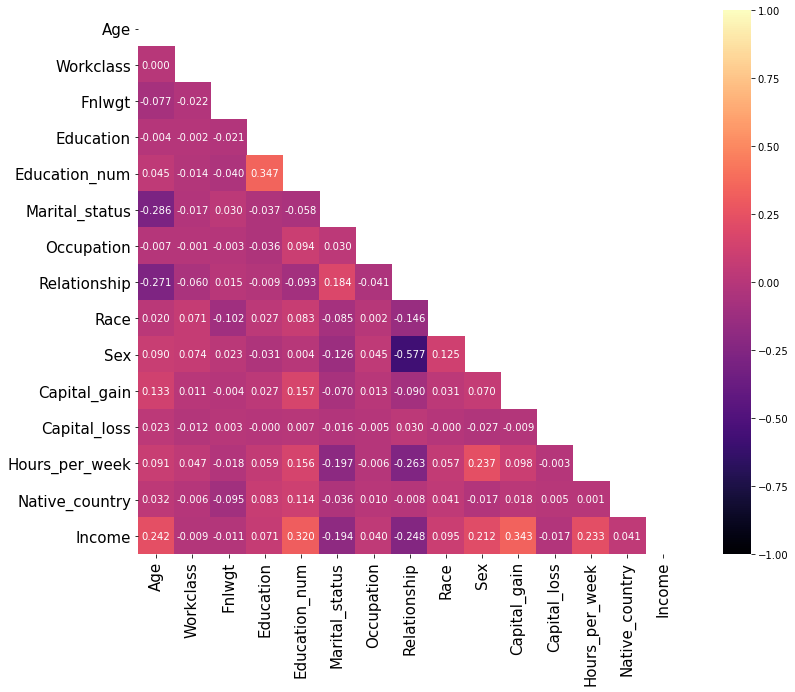

In [218]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Using heatmap ,this shows there is no strong multicollinearity among the variables so need to apply 
PCA(principal component analysis) or Variance Inflation Factor techniques.

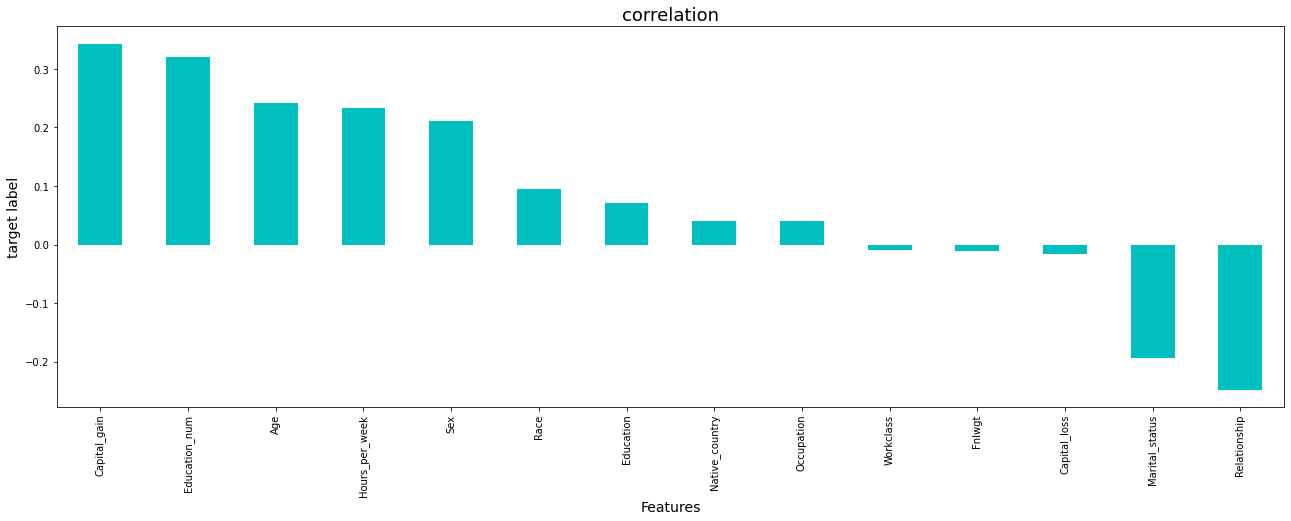

In [219]:
#bar plot showing correlation bw target and features
plt.figure(figsize=(22,7))
dfnew.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

This shows target variable is positively and negtaively correlated with feature.So in this,Target variable'Income' is positively
correlated with capital-gain,education_num,age,hours_per_week,sex ,race,education,occupation,native_country,workers and negatively correlated with marital_status and 
relationship.

# checking skewness

In [220]:
df.skew()

Age                0.484849
Workclass         -0.663777
Fnlwgt             0.628132
Education         -0.955885
Education_num     -0.146011
Marital_status    -0.045708
Occupation         0.101699
Relationship       0.753819
Race              -2.585938
Sex               -0.689465
Capital_gain       4.931812
Capital_loss      29.520944
Hours_per_week    -0.360027
Native_country    -4.364306
Income             1.322364
dtype: float64

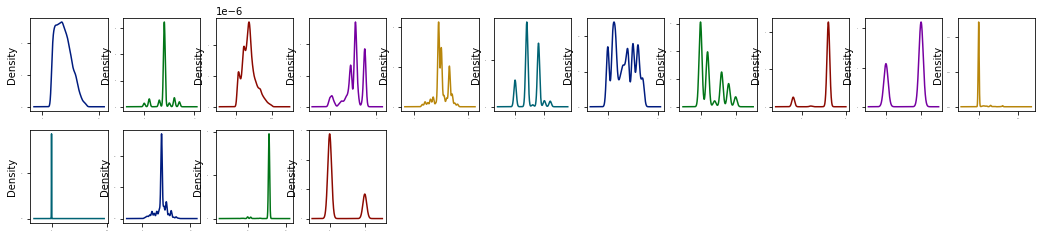

In [221]:
#checking for skewed data
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

# Splitting into x and y before removing skewness

In [222]:
x=dfnew.drop('Income',axis=1)   #Independent variables
y=dfnew['Income']    #Dependent or Target Variable

In [223]:
#Checking x data
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,22.0


In [224]:
y.head() #checking target column data

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

# Feature Scaling

In [225]:
from sklearn.preprocessing import StandardScaler
X_features=x
x=StandardScaler().fit_transform(x)

# Removinh Skewness using PowerTransform

In [226]:
#Log transform for numerical datatype using power transform it can work uoon both negative and positive skewed value 
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.92743293,  1.69535012, -1.17549181, ..., -0.0402788 ,
        -2.236612  ,  0.18156209],
       [ 0.11646083, -0.02117009,  0.43103233, ..., -0.0402788 ,
        -0.04110889,  0.18156209],
       [ 1.10635116, -0.02117009,  0.61388168, ..., -0.0402788 ,
        -0.04110889,  0.18156209],
       ...,
       [ 1.39019297, -0.02117009, -0.26835023, ..., -0.0402788 ,
        -0.04110889,  0.18156209],
       [-1.32084532, -0.02117009,  0.28863069, ..., -0.0402788 ,
        -1.69957626,  0.18156209],
       [ 1.04749941,  0.79658907,  1.08209647, ..., -0.0402788 ,
        -0.04110889,  0.18156209]])

# Removing imbalance issue in label column using SMOTE

In [227]:
#  samples to make all the target categorical  values same
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [228]:
y.value_counts() #balanced data

0    21552
1    21552
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

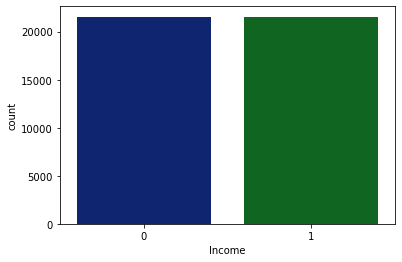

In [229]:
sns.countplot(y) #showing balanced data visiually

# MODEL BUILDING
Base model:Logistic Regression

In [230]:
lg = LogisticRegression()
from sklearn.model_selection import train_test_split

In [231]:
maxRS=0
maxAccu=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7803866432337434 on Random State 245


In [233]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=245) 

In [234]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[3383 3651]
 [3400 3791]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      7034
           1       0.51      0.53      0.52      7191

    accuracy                           0.50     14225
   macro avg       0.50      0.50      0.50     14225
weighted avg       0.50      0.50      0.50     14225



The accuracy score for logistic regression is 50% and Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=3383,It states that 3383 positive class data points were correctly classified by the model.

True Negative(TN)=3791,It states that 3791 negative class data points were correctly classified by the model.

False Positive(FP)=3651,It states that 3651 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=3400 ,It states that 3400 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its not a good classifier as from our dataset as there is large number of false positive and false negative values.

# Cross validation score for logistic regression

In [235]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
css=accuracy_score(y_test,pred_lg)

In [236]:
for j in range(2,10):
    css_score=cross_val_score(lg,x,y,cv=j)
    csc=css_score.mean()
    print("At cv:-",j)
    print("cross validation score is :-",csc*100)
    print("accuracy score is :-",css*100)
    print('\n')

At cv:- 2
cross validation score is :- 77.1923719376392
accuracy score is :- 78.12302284710017


At cv:- 3
cross validation score is :- 77.16221232368227
accuracy score is :- 78.12302284710017


At cv:- 4
cross validation score is :- 77.20165181885672
accuracy score is :- 78.12302284710017


At cv:- 5
cross validation score is :- 77.16918946370367
accuracy score is :- 78.12302284710017


At cv:- 6
cross validation score is :- 77.18309205642169
accuracy score is :- 78.12302284710017


At cv:- 7
cross validation score is :- 77.19239399133791
accuracy score is :- 78.12302284710017


At cv:- 8
cross validation score is :- 77.19701187824796
accuracy score is :- 78.12302284710017


At cv:- 9
cross validation score is :- 77.17613805975661
accuracy score is :- 78.12302284710017




We will be taking cv=5 as there is no high gap between cross validation score and accuracy score.

In [237]:
csc_selected=cross_val_score(lg,x,y,cv=5).mean()
print("The  cv score is :-",csc_selected *100,"\n The accuracy score is ",css*100)

The  cv score is :- 77.16918946370367 
 The accuracy score is  78.12302284710017


We will take cv score as the final accuracy score which is 77.16 as it has reduced the overfitting problem.

# Modelling-Other models

In [238]:
#Modelling
#Model 1-Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=245)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[5954 1080]
 [ 991 6200]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7034
           1       0.85      0.86      0.86      7191

    accuracy                           0.85     14225
   macro avg       0.85      0.85      0.85     14225
weighted avg       0.85      0.85      0.85     14225



The accuracy score for DecisionTreeClassifier is 85% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=5954,It states that 5954 positive class data points were correctly classified by the model.

True Negative(TN)=6200,It states that 6200 negative class data points were correctly classified by the model.

False Positive(FP)=1080,It states that 1080 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=991 ,It states that 991 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn larger number of true positive and true negative values

In [239]:
#Model 2-Random Forest

from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=245)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[6249  785]
 [ 607 6584]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7034
           1       0.89      0.92      0.90      7191

    accuracy                           0.90     14225
   macro avg       0.90      0.90      0.90     14225
weighted avg       0.90      0.90      0.90     14225



The accuracy score for Random Forest Classifier is 90% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=6249,It states that 6249 positive class data points were correctly classified by the model.

True Negative(TN)=6584,It states that 6584 negative class data points were correctly classified by the model.

False Positive(FP)=785,It states that 785 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=607 ,It states that 607 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn larger number of true positive and true negative values

In [241]:
#Model 3-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=245)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[5839 1195]
 [ 831 6360]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7034
           1       0.84      0.88      0.86      7191

    accuracy                           0.86     14225
   macro avg       0.86      0.86      0.86     14225
weighted avg       0.86      0.86      0.86     14225



The accuracy score for AdaBoostClassifier is 86% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=5839,It states that 5839 positive class data points were correctly classified by the model.

True Negative(TN)=6360,It states that 6360 negative class data points were correctly classified by the model.

False Positive(FP)=1195,It states that 1195 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=831 ,It states that 831 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn larger number of true positive and true negative values

In [242]:
#Model 4- KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=15)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[5219 1815]
 [ 573 6618]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      7034
           1       0.78      0.92      0.85      7191

    accuracy                           0.83     14225
   macro avg       0.84      0.83      0.83     14225
weighted avg       0.84      0.83      0.83     14225



The accuracy score for KNeighborsClassifier is 83% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=5219,It states that 5219 positive class data points were correctly classified by the model.

True Negative(TN)=6618,It states that 6618 negative class data points were correctly classified by the model.

False Positive(FP)=1815,It states that 1815 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=573 ,It states that 573 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn larger number of true positive and true negative values

In [243]:
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=245)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[5356 1678]
 [ 652 6539]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      7034
           1       0.80      0.91      0.85      7191

    accuracy                           0.84     14225
   macro avg       0.84      0.84      0.84     14225
weighted avg       0.84      0.84      0.84     14225



The accuracy score for Support Vector Machine is 84% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=5356,It states that 5356 positive class data points were correctly classified by the model.

True Negative(TN)=6539,It states that 6539 negative class data points were correctly classified by the model.

False Positive(FP)=1678,It states that 1678 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=652 ,It states that 652 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn larger number of true positive and true negative values

Thus we see,

The accuracy score of Decision tree classifier is 85%

The accuracy score of Random Forest Classifier is 90%

The accuracy score of Kneighbors Classifier is 86%

The accuracy score of Ada Boosting is 83%

The accuracy score of Support vector machine (SVM) is 84%

Conclusion: We see that almost all the models are showing good accuracy rate ,now we will check cross validation for all the models for overfitting.

CROSS VALIDATION For the models

In [244]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x,y,cv=5)
print("The cross validation score of Logistic Regression model is :",scr.mean())

The cross validation score of Logistic Regression model is : 0.7716918946370367


In [245]:
scr=cross_val_score(model1,x,y,cv=5)
print("The cross validation score of Desicion Tree Classifier is :",scr.mean())

The cross validation score of Desicion Tree Classifier is : 0.8524506257449905


In [246]:
scr=cross_val_score(model2,x,y,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.9013787355163334


In [247]:
scr=cross_val_score(model3,x,y,cv=5)
print("The cross validation score of AdaBoost Classifier is :",scr.mean())

The cross validation score of AdaBoost Classifier is : 0.8489470082093286


In [248]:
scr=cross_val_score(model4,x,y,cv=5)
print("The cross validation score of GradientBoosting Classifier is :",scr.mean())

The cross validation score of GradientBoosting Classifier is : 0.8358159552659817


In [250]:
scr=cross_val_score(model5,x,y,cv=5)
print("The cross validation score of SVM Classifier is :",scr.mean())

The cross validation score of SVM Classifier is : 0.8288791412325862


Thus we see that after doing cross validation ,we can see the scores that Cross validation score of all the models have been reduced which means that cross validation is not decreasing the accuracy,it is rather giving us a better approximation for that accuracy, including less overfitting.So as per the avobe models:

Cross validation score :

Logistic Regression:77.16%

DEsicion Tree:85.24%

RandomForest:90.13%

AdaBoost:84.89%

GradientBoosting:83.58%

SVM:82.88%

So I am taking Random Forest rather for hyperparameter tuning under GridSearch as from the confusion matrix also we can see less error are detected by randomforest model compare to other models.

# HYper parameter tuning

In [253]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [254]:
model2=RandomForestClassifier(random_state=245)
GCV=GridSearchCV(model2,parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
print(GCV.best_params_)#Printing the best p arameters obtained
print(GCV.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
0.8411302778477294


Best paramters are {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
0.8522430212507303

In [255]:
#fitting the best parameters
GCV=RandomForestClassifier(max_depth=8,n_estimators=500,criterion='gini',max_features='auto')
GCV.fit(x_train,y_train)  
pred=GCV.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(GCV,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  85.21616871704745
Cross validation score:  84.40982912550183


Thus after cross validation and then doing hypertuning with best parametrs the accuracy score is 85.21 and cross validation score is 84.40 though the scores has recudes but this 
is the best approximation after reducing overtting.So we will consider this our best fir model.

# AUC_ROC PLOT 

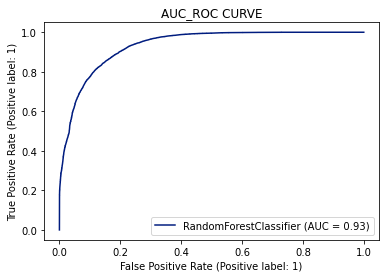

In [256]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV,x,y)
plt.title("AUC_ROC CURVE")
plt.show()

OBSERVATION: So final accuracy is 84.41% as our cross val score accurcay and auc_roc score is 93 % which is good and here 
we can see our AUC (c-value) is far greater than 0.5 ,it is 0.93 which can be considered very good which means that 
the classifier is able to disntinguish between 0 and 1. So it can distinguish the whether the person makes income over $50k a year or not. 
We can defintly employ this model.

# SAVING THE MODEL

In [257]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='census_income.pkl'
pickle.dump(GCV,open(filename,'wb'))

# CONCLUSION:

In [259]:
loaded_model=pickle.load(open('census_income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #it gives us 85.21% accuracy which is good.

85.21616871704745


In [260]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,13975,13976,13977,13978,13979,13980,13981,13982,13983,13984,13985,13986,13987,13988,13989,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999,14000,14001,14002,14003,14004,14005,14006,14007,14008,14009,14010,14011,14012,14013,14014,14015,14016,14017,14018,14019,14020,14021,14022,14023,14024,14025,14026,14027,14028,14029,14030,14031,14032,14033,14034,14035,14036,14037,14038,14039,14040,14041,14042,14043,14044,14045,14046,14047,14048,14049,14050,14051,14052,14053,14054,14055,14056,14057,14058,14059,14060,14061,14062,14063,14064,14065,14066,14067,14068,14069,14070,14071,14072,14073,14074,14075,14076,14077,14078,14079,14080,14081,14082,14083,14084,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094,14095,14096,14097,14098,14099,14100,14101,14102,14103,14104,14105,14106,14107,14108,14109,14110,14111,14112,14113,14114,14115,14116,14117,14118,14119,14120,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134,14135,14136,14137,14138,14139,14140,14141,14142,14143,14144,14145,14146,14147,14148,14149,14150,14151,14152,14153,14154,14155,14156,14157,14158,14159,14160,14161,14162,14163,14164,14165,14166,14167,14168,14169,14170,14171,14172,14173,14174,14175,14176,14177,14178,14179,14180,14181,14182,14183,14184,14185,14186,14187,14188,14189,14190,14191,14192,14193,14194,14195,14196,14197,14198,14199,14200,14201,14202,14203,14204,14205,14206,14207,14208,14209,14210,14211,14212,14213,14214,14215,14216,14217,14218,14219,14220,14221,14222,14223,14224
Predicted,0,1,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,...,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1
Original,0,1,0,0,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,...,1,0,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,

This test shows that the model is able to predict the correct result around 85% and rest 15% it is predicting wrong.